# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This is a data analysis project for WGU C749 course.

### Dataset Description 
The data that we're going to use comes from [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). The following is a list of all the columns found in the dataset:

- id
- imdb_id
- popularity - *Measure of a movie's popularity.*
- budget
- revenue
- original_title - *Movie title. We need this is easily identify the movie*
- cast- *list of cast members delimited by '|'*
- homepage 
- director
- tagline
- keywords
- overview
- runtime - *duration of the movie*
- genres- *list of genres delimited by '|'*
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj - *the values here are adjusted for inflation*
- revenue_adj - *the values here are adjusted for inflation*



### Question(s) for Analysis

1. What are the most popular movies?
2. Which genres are most popular from?
3. What movies have the highest budgets?
4. What movies have the highest revenue?
5. What movies are most profitable?
6. Describe the sweetspot for the runtime feature.
7. Are any of the features correlated?

Let's begin.

On this cell below, we're importing the packages/libraries that we will need for the project.

In [1]:
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

The cell below contains all of the program's functions.

In [2]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    """
    Takes a dataframe and parameters and
    calls the get_values function.
    """
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param) 

In [3]:
def calculate_toppers(df, column):
    """
    Sorts a dataframe by the supplied column name and
    lists the top 10 rows.
    """ 
    return df.sort_values(by = column, ascending = False).head(10)

In [4]:
def pipe_counter(df, column):
    """
    Takes a dataframe, a column, and returns
    the top 10 rows of that column.
    """
    string_all = df[column].str.cat(sep = '|')
    series_all = pd.Series(string_all.split('|'))
    top5_all = series_all.value_counts(ascending = False)
    return top5_all.head()

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties



In [5]:
# read a csv file
df = pd.read_csv('../data/in/tmdb-movies.csv')

Let's get a feel for the dataset.

In [6]:
df.shape
df.info()

(10866, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

We only need certain columns. Let's create another dataframe that contains only the desired columns.

In [7]:
df1 = df[['original_title',
          'popularity',
          'cast',
          'director',
          'runtime',
          'genres',
          'release_year',
          'budget_adj',
          'revenue_adj',          
        ]]

Let's see how many rows we have.

In [8]:
print('This dataframe has {} rows or records.'.format(df1.shape[0]))

This dataframe has 10866 rows or records.


Now, let's drop the duplicates.

In [9]:
df1.drop_duplicates(keep ='first', inplace=True)
print('This dataframe now has {} rows or records.'.format(df1.shape[0]))

This dataframe now has 10865 rows or records.


C:\Users\Dd\AppData\Local\Temp\ipykernel_2728\1324486049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(keep ='first', inplace=True)


Then, we will drop all the rows that has a NaN value. We will create another dataframe before then because of the large number of rows that are being dropped.

In [10]:
df2 = df1.dropna()
print('This dataframe now has {} rows or records.'.format(df2.shape[0]))

This dataframe now has 10731 rows or records.


Finally, let's convert 0 into NaNs and drop them. Let's create another data that reflects this latest change.

In [11]:
# creating a seperate list of revenue and budget column
nonzero =['budget_adj', 'revenue_adj']

#this will replace all the value from '0' to NAN in the list
df2[nonzero] = df2[nonzero].replace(0, np.NAN)

df3 = df2.dropna()
print('This dataframe now has {} rows or records.'.format(df3.shape[0]))

This dataframe now has 3849 rows or records.


C:\Users\Dd\AppData\Local\Temp\ipykernel_2728\1935603876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[nonzero] = df2[nonzero].replace(0, np.NAN)


<a id='eda'></a>
## Exploratory Data Analysis

Let's take a quick peek at the dataset.

In [12]:
df3.head()

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  3849 non-null   object 
 1   popularity      3849 non-null   float64
 2   cast            3849 non-null   object 
 3   director        3849 non-null   object 
 4   runtime         3849 non-null   int64  
 5   genres          3849 non-null   object 
 6   release_year    3849 non-null   int64  
 7   budget_adj      3849 non-null   float64
 8   revenue_adj     3849 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 300.7+ KB


In [14]:
df3.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,1.192933,109.217459,2001.258249,4.429360e+07,1.372313e+08
std,1.475622,19.914141,11.285642,4.481360e+07,2.162018e+08
min,0.001117,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463337,95.000000,1995.000000,1.316623e+07,1.843023e+07
50%,0.798582,106.000000,2004.000000,3.005030e+07,6.181393e+07
75%,1.374300,119.000000,2010.000000,6.076720e+07,1.634115e+08
max,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09


### Research Question 1 - What are the most popular movies?

In [15]:
top_popular = calculate_toppers(df3, 'popularity')
top_popular

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
629,Interstellar,24.949134,Matthew McConaughey|Jessica Chastain|Anne Hathaway|Michael Caine|Casey Affleck,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014,1.519800e+08,5.726906e+08
630,Guardians of the Galaxy,14.311205,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel|Bradley Cooper,James Gunn,121,Action|Science Fiction|Adventure,2014,1.565855e+08,7.122911e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
631,Captain America: The Winter Soldier,12.971027,Chris Evans|Scarlett Johansson|Sebastian Stan|Samuel L. Jackson|Robert Redford,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,2014,1.565855e+08,6.583651e+08
1329,Star Wars,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,George Lucas,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09
632,John Wick,11.422751,Keanu Reeves|Michael Nyqvist|Alfie Allen|Willem Dafoe|Dean Winters,Chad Stahelski|David Leitch,101,Action|Thriller,2014,1.842182e+07,7.252661e+07
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
633,The Hunger Games: Mockingjay - Part 1,10.739009,Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Donald Sutherland,Francis Lawrence,123,Science Fiction|Adventure|Thriller,2014,1.151364e+08,6.927528e+08


### Research Question 2 - Which genres are most popular?

In [16]:
pipe_counter(top_popular, 'genres')

Adventure          9
Science Fiction    9
Action             7
Thriller           5
Drama              1
dtype: int64

[Text(0.5, 1.0, 'Frequently Used Genres in the Most Popular Movies')]

Text(0.5, 0, '# of Movies in the dataset')

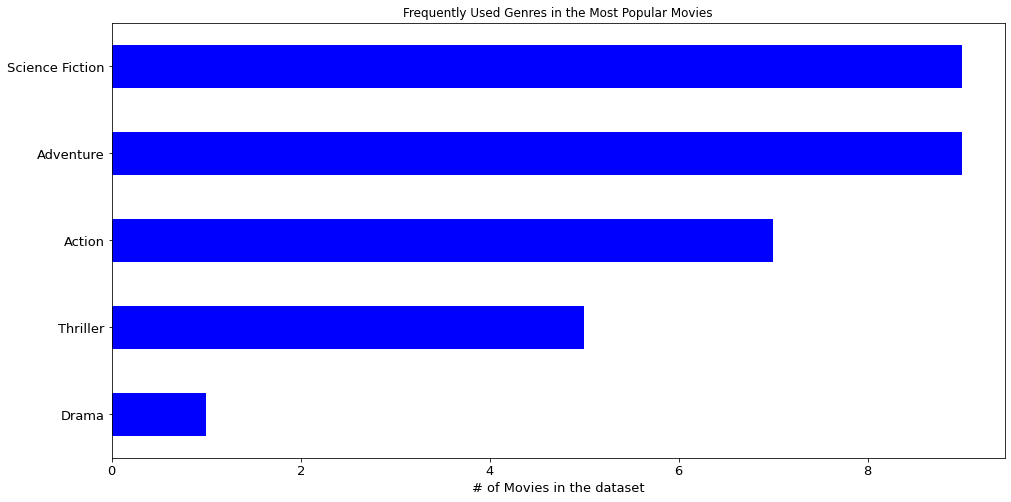

In [17]:
genres = pipe_counter(top_popular, 'genres')
genres.sort_values(ascending = True, inplace = True)

lt = genres.plot.barh(color = 'blue', fontsize = 13)
lt.set(title = 'Frequently Used Genres in the Most Popular Movies')
lt.set_xlabel('# of Movies in the dataset', color = 'black', fontsize = '13')
lt.figure.set_size_inches(16, 8)
plt.show()

### Research Question 3 - What movies have the highest budgets?

In [18]:
top_budget = calculate_toppers(df3, 'budget_adj')
top_budget

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
2244,The Warrior's Way,0.250540,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Danny Huston|Ti Lung,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010,4.250000e+08,1.108757e+07
3375,Pirates of the Caribbean: On Stranger Tides,4.955130,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian McShane|Kevin McNally,Rob Marshall,136,Adventure|Action|Fantasy,2011,3.683713e+08,9.904175e+08
7387,Pirates of the Caribbean: At World's End,4.965391,Johnny Depp|Orlando Bloom|Keira Knightley|Geoffrey Rush|Bill Nighy,Gore Verbinski,169,Adventure|Fantasy|Action,2007,3.155006e+08,1.010654e+09
6570,Superman Returns,1.957331,Brandon Routh|Kevin Spacey|Kate Bosworth|James Marsden|Parker Posey,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,2006,2.920507e+08,4.230205e+08
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,James Cameron,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09
7394,Spider-Man 3,2.520912,Tobey Maguire|Kirsten Dunst|James Franco|Thomas Haden Church|Topher Grace,Sam Raimi,139,Fantasy|Action|Adventure,2007,2.713305e+08,9.369017e+08
1929,Tangled,2.865684,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perlman|M.C. Gainey,Nathan Greno|Byron Howard,100,Animation|Family,2010,2.600000e+08,5.917949e+08
14,Avengers: Age of Ultron,5.944927,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson,Joss Whedon,141,Action|Adventure|Science Fiction,2015,2.575999e+08,1.292632e+09
1389,Harry Potter and the Half-Blood Prince,5.076472,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom Felton|Julie Walters,David Yates,153,Adventure|Fantasy|Family,2009,2.541001e+08,9.492765e+08
8089,Waterworld,1.232098,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. Call|Zitto Kazann,Kevin Reynolds,135,Adventure|Action,1995,2.504192e+08,3.780875e+08


### Research Question 4 - What movies have the highest revenue?

In [19]:
top_revenue = calculate_toppers(df3, 'revenue_adj')
top_revenue

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
1386,Avatar,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09
1329,Star Wars,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,George Lucas,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,James Cameron,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason Miller|Lee J. Cobb,William Friedkin,122,Drama|Horror|Thriller,1973,3.928928e+07,2.167325e+09
9806,Jaws,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorraine Gary|Murray Hamilton,Steven Spielberg,124,Horror|Thriller|Adventure,1975,2.836275e+07,1.907006e+09
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
8889,E.T. the Extra-Terrestrial,2.900556,Henry Thomas|Drew Barrymore|Robert MacNaughton|Dee Wallace|Peter Coyote,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,1982,2.372625e+07,1.791694e+09
8094,The Net,1.136610,Sandra Bullock|Jeremy Northam|Dennis Miller|Wendy Gazelle|Ken Howard,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995,3.148127e+07,1.583050e+09
10110,One Hundred and One Dalmatians,2.631987,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Martha Wentworth|Ben Wright,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1961,2.917944e+07,1.574815e+09
4361,The Avengers,7.637767,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chris Hemsworth|Scarlett Johansson,Joss Whedon,143,Science Fiction|Action|Adventure,2012,2.089437e+08,1.443191e+09


### Research Question 5 - What movies are most profitable?

In [20]:
df3['profit'] = df3.revenue_adj + df3.budget_adj

C:\Users\Dd\AppData\Local\Temp\ipykernel_2728\4085918358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['profit'] = df3.revenue_adj + df3.budget_adj


In [21]:
df3.head()

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.530446e+09
1,Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,4.861612e+08
2,Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,3.728190e+08
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,2.086723e+09
4,Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.560549e+09


In [22]:
top_profit = calculate_toppers(df3, 'profit')
top_profit

,original_title,popularity,cast,director,runtime,genres,release_year,budget_adj,revenue_adj,profit
1386,Avatar,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09,3.068011e+09
1329,Star Wars,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,George Lucas,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09,2.829288e+09
5231,Titanic,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,James Cameron,194,Drama|Romance|Thriller,1997,2.716921e+08,2.506406e+09,2.778098e+09
10594,The Exorcist,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason Miller|Lee J. Cobb,William Friedkin,122,Drama|Horror|Thriller,1973,3.928928e+07,2.167325e+09,2.206614e+09
3,Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,2.086723e+09
9806,Jaws,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorraine Gary|Murray Hamilton,Steven Spielberg,124,Horror|Thriller|Adventure,1975,2.836275e+07,1.907006e+09,1.935369e+09
8889,E.T. the Extra-Terrestrial,2.900556,Henry Thomas|Drew Barrymore|Robert MacNaughton|Dee Wallace|Peter Coyote,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,1982,2.372625e+07,1.791694e+09,1.815421e+09
4361,The Avengers,7.637767,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chris Hemsworth|Scarlett Johansson,Joss Whedon,143,Science Fiction|Action|Adventure,2012,2.089437e+08,1.443191e+09,1.652135e+09
8094,The Net,1.136610,Sandra Bullock|Jeremy Northam|Dennis Miller|Wendy Gazelle|Ken Howard,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995,3.148127e+07,1.583050e+09,1.614531e+09
10110,One Hundred and One Dalmatians,2.631987,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Martha Wentworth|Ben Wright,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1961,2.917944e+07,1.574815e+09,1.603994e+09


### Research Question 6 - Describe the sweetspot for the runtime feature.

<Figure size 1600x800 with 0 Axes>

Text(0.5, 0, 'Runtime of the Movies')

Text(0, 0.5, '# of Movies in the Dataset')

Text(0.5, 1.0, 'Runtime of all the movies')

(array([  1.,   1.,   1.,   0.,   0.,   4.,  35., 306., 923., 831., 637.,
        463., 274., 185.,  67.,  46.,  28.,  16.,  11.,  11.,   3.,   3.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([ 15.        ,  24.22857143,  33.45714286,  42.68571429,
         51.91428571,  61.14285714,  70.37142857,  79.6       ,
         88.82857143,  98.05714286, 107.28571429, 116.51428571,
        125.74285714, 134.97142857, 144.2       , 153.42857143,
        162.65714286, 171.88571429, 181.11428571, 190.34285714,
        199.57142857, 208.8       , 218.02857143, 227.25714286,
        236.48571429, 245.71428571, 254.94285714, 264.17142857,
        273.4       , 282.62857143, 291.85714286, 301.08571429,
        310.31428571, 319.54285714, 328.77142857, 338.        ]),
 <BarContainer object of 35 artists>)

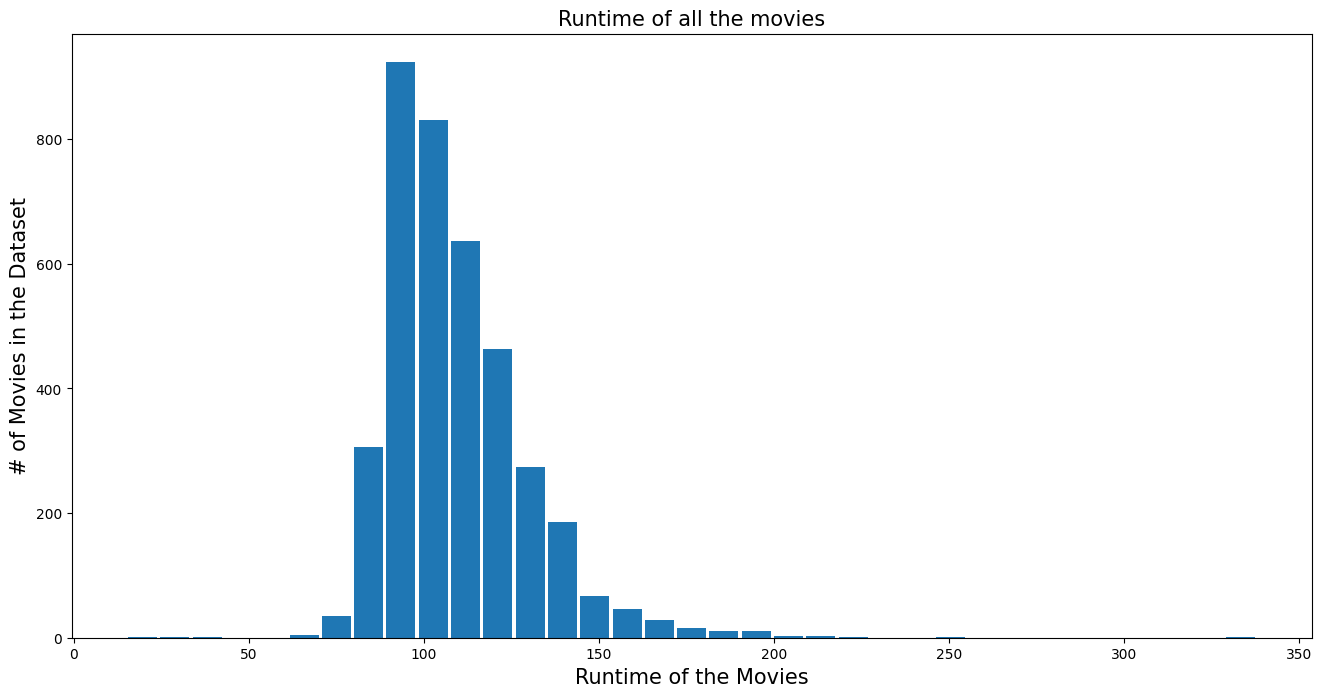

In [23]:
plt.figure(figsize=(16,8), dpi = 100)
plt.xlabel('Runtime of the Movies', fontsize = 15)
plt.ylabel('# of Movies in the Dataset', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(df3['runtime'], rwidth = 0.9, bins =35)
plt.show()

In [24]:
df3['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Research Question 7 - Are any of the features correlated?

In [25]:
corr = round(df3.corr(),2)

<AxesSubplot:>

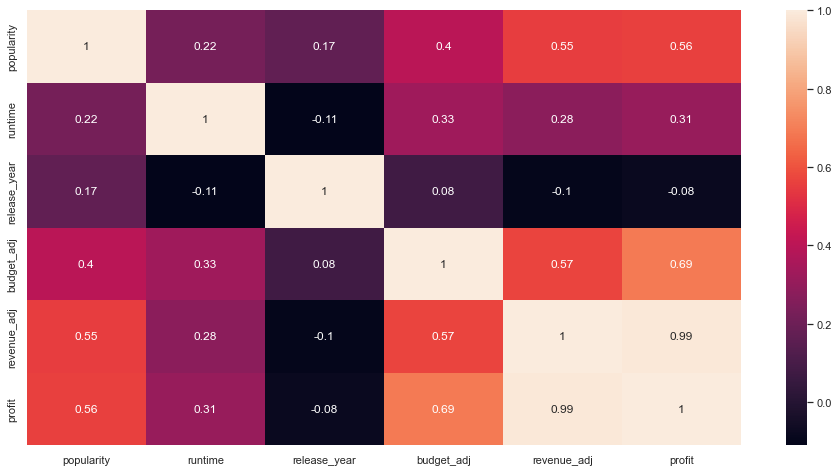

In [26]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr, annot=True)

<a id='conclusions'></a>
## Conclusions

Although, we did not find any strong correlation between the selected variables, this dataset was still fun to explore.

### Findings
1. Jurassic World is the most popular movie.
2. For the top ten most popular movies, adventure, science fiction, action, thriller, and drama are the most popular genres.
3. The Warrior's Way had the biggest budget.
4. And Avatar bringing in the most money.
5. But Jurassic World took the crown for profitability.
6. The average runtime of a movie in the most popular subset is 109 minutes.
7. No strong correlation on this dataset.

### Limitations
Some of the analysis was done on a subset that consisted of the top ten most popular movies which may not be enough to conclude anything of value. Dropping all rows with NaN values significantly change the shape of the dataframe. Perhaps nextime, we should impute the missing values instead of droppoing them.

### Next Steps
Modifying the parameters of the subset of data could greatly improved the result of this analysis. Instead of an arbitrary hardcoded number of 10, perhaps we could substiture it instead with a percentage or quartile.

Making a network graph of the cast would be interesting too.